### Question 2 - SVD and Image Compression

- The aim of this assignment is to apply SVD decomposition to an image in order to allow image compression
- Singular Value Decomposition is a factorization technique in which any matrix can be decomposed into three matrices with specific properties. When multiplied together, the result is the best approximation of the original matrix 
- The code below opens an image and convert it to black and white

590x350 px


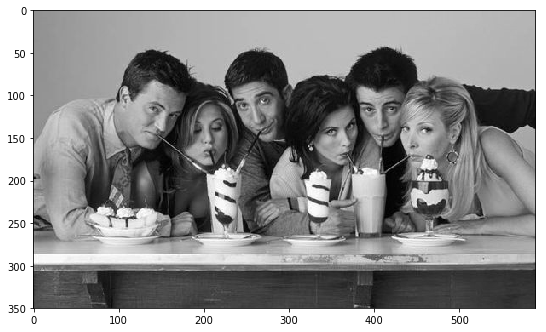

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

# converting to B&W
img = Image.open('image.jpg').convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(img)

print('%sx%s px' %(img.size[0], img.size[1]))

In [6]:
# converting the image data into a numpy matrix

imgmat = np.array(list(img.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)

### Singular values, error images and compression ratio

- The loop below shows the reconstructed image using the first r singular values of the SVD
- Notice that the first 55 singular values produce an image very close the original image, and the more values used, the closer the reconstruction gets to the original picture
- With r = 25, it might be possible to perform face recognition in the sense that it is possible to tell that the object is a face of a person. However, r = 35 would give a more accurate result, because it makes it easier to recognize in fact who the person is
- If the intention is to recognize dark and bright spots only, r = 5 is a good parameter
- In order to recognize forms such as cars and people, we can use r = 15. In this example, with r = 15 it is possible to count the number of people in the picture. However, for small objects like the milkshakes, it would be better to use r = 25
- The data compression ratio for each value of r used is given below. The result is defined as the ratio between the uncompressed and compressed bytes.

In [30]:
# calculate the compression ratio of an compressed image to the original image
def compression_ratio(i, m, n):
    comp_bytes = i * (m + n) + i  
    
    return (comp_bytes / (m * n)) * 100

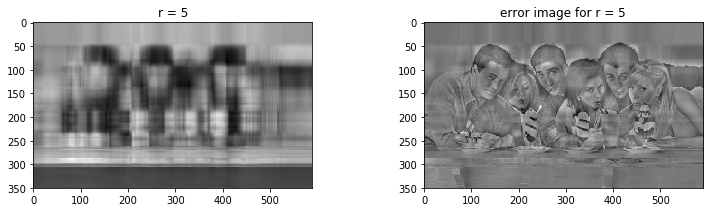

Compression ratio: 2.28%



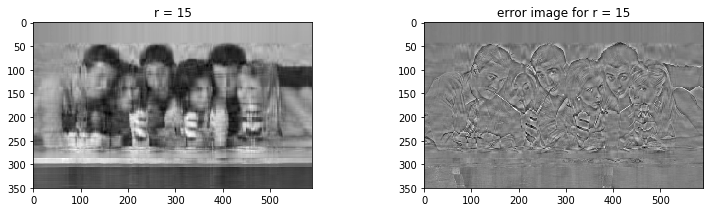

Compression ratio: 6.84%



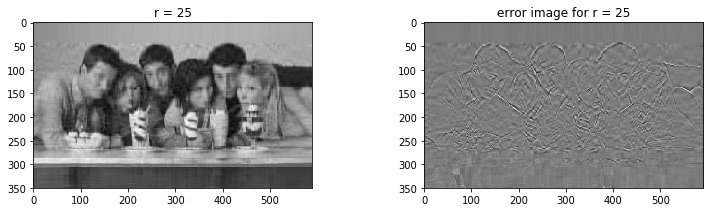

Compression ratio: 11.39%



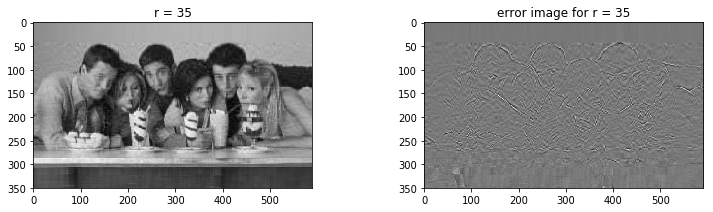

Compression ratio: 15.95%



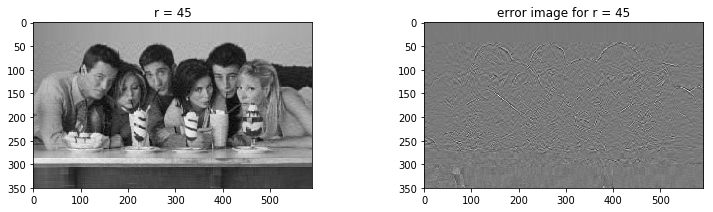

Compression ratio: 20.51%



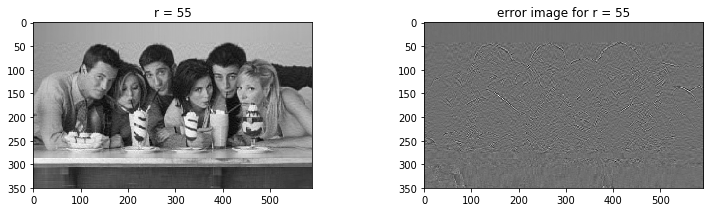

Compression ratio: 25.06%



In [32]:
# sigma has all singular values of the img
U, sigma, V = np.linalg.svd(imgmat)

# dimensions of the matrix
m = float(imgmat.shape[0])
n = float(imgmat.shape[1])

for i in xrange(5, 56, 10):
    
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    cr = compression_ratio(i, m, n)
    
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    plt.subplot(1, 2, 1)
    plt.imshow(reconstimg, cmap='gray')
    title = "r = %s" % i
    plt.title(title)
    
    plt.subplot(1, 2, 2)
    errorimg = imgmat - reconstimg
    plt.imshow(errorimg, cmap='gray')
    title = "error image for r = %s" % i
    plt.title(title)
    
    plt.show()
    
    print("Compression ratio: %.2f" %cr + str('%'))
    print('')
    

### Other methods of image compression

Besides SVD, many other techniques can be used for compressing images, such as:
    
- **Discrete Cosine Transform (DCT):** works by separating the image in terms of a sum of cosine functions oscillating at different frequencies.
- **Run-length encoding (RLE):** sequences in which the same data value occurs in many consecutive data elements are stored as a single data value and count, rather than as the original run. Consider, for example, simple graphic images such as icons, line drawings, and animations.
- **Chain code:** a lossless compression algorithm for monochrome images. The basic principle of chain codes is to separately encode each connected component, or "blob", in the image.
- **Chroma subsampling:** this takes advantage of the fact that the human eye perceives spatial changes of brightness more sharply than those of color, by averaging or dropping some of the chrominance information in the image.
- **Reducing the color space to the most common colors in the image**. The selected colors are specified in the colour palette in the header of the compressed image. Each pixel just references the index of a color in the color palette, this method can be combined with dithering to avoid posterization.